In [1]:
# plotting libraries

# for inline plots in jupyter
if True:
    %matplotlib inline
else:
    %matplotlib notebook
    
    
# import matplotlib
import matplotlib.pyplot as plt

#import numpy
import numpy as np

#import scipy.stats
import scipy.stats

# for latex equations
from IPython.display import Math, Latex

# for displaying images
from IPython.core.display import Image

# import seaborn
#import seaborn as sns

# settings for seaborn plotting style
#sns.set(color_codes=True)

# settings for seaborn plot sizes
#sns.set(rc={'figure.figsize':(5,5)})



# Distributions



# Variables aleatorias

## Función densidad de probabilidad (p.d.f)

Una variable aleatoria $X$ puede ser continua o discreta.


* Una función densidad de probabilidad (p.d.f) de una variable aleatoria continua se define como cualquier función positiva $f(x)$ que satisfaga la igualdad 
$$
 \int_{-\infty}^\infty f(x) \, dx = 1
$$
El conjunto de valores en la variable aleatoria $x$ para los $f(x) \neq 0$ constituye el dominio, rango o soporte de la variable aleatoria. 

 Una función definida positiva $g(x)$ tal que $ C = \int_{-\infty}^\infty g(x) dx$ se puede convertir a una función densidad de probabilidad $f(x)$ normalizándola 
$$
f(x) = \frac{g(x)}{C}
$$
Ejemplos de funciones de densidad de probabilidad de variables aleatorias continuas son la distribución uniforme, la distribución exponencial, la distribución normal,..etc.

    El valor de $f(x)$ para un determinado valor $x$ de la v.a representa la probabilidad de la v.a X tome un valor en un *entorno*  $x+ \delta x$ centrado en $x$
$$
P(X \in [x, x+\delta x] ) = f(x) \, \delta x 
$$

* Cuando el dominio de la variable aleatoria está definido por un número contable de valores $x_1, x_2, \ldots$ se dice que la variable aleatoria es discreta. En este caso la función de densidad de probabilidad (a veces llamada *función de masa*) se define como 
$$
p(x_i) = P(X=x_i) = p_i
$$
donde las probabilidades $p(x_i) \geq 0$, $i=1,2, \ldots$ y $\sum_{i=1} p(x_i) = 1$  

 Ejemplos de de funciones densidad de probabilidad de distribuciones discretas son la distribución de Bernulli, la distribución binomial o la distribución de Poisson


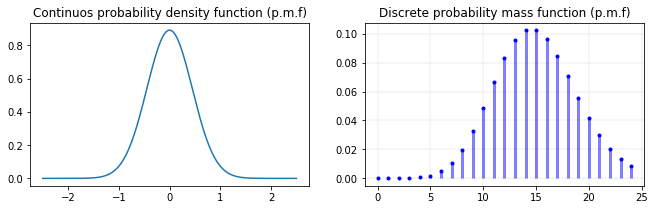

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(11,3)) 

x = np.linspace(-2.5, 2.5, 900)

mu  = 0.  # loc
sigma = np.sqrt(0.2)  # scale
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma) 
ax[0].plot(x, y)
ax[0].set_title('Continuos probability density function (p.m.f)')


x = np.arange(0, 25)
mu = 15
y = scipy.stats.poisson.pmf(x, mu)
ax[1].plot(x, y, 'bo', ms=3)
ax[1].vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
#ax[1].legend(loc='best', frameon=False)
ax[1].grid(lw=0.2)
ax[1].set_title('Discrete probability mass function (p.m.f)')

plt.show()

## Función de distribución acumulada (c.d.f)

La función de distrubución acumulada (c.d.f) se define como la probabilidad de que la variable aleatoria $X$ tome un valor menor o igual a $x$

$$ \text{P}(X < x) = \text{F}_X(x) =  \int_{-\infty}^x f(z) \,  dz $$

donde $f(z)$ es la función densidad de probabilidad de la variable aleatoria. Al ser $F(x)$ una probabilidad acumulada sus propiedades son:

- $F(x) \geq 0 \, \,   \forall x$
- $F(x)$ es una función monotóna no decreciente
- $\lim_{x \rightarrow \infty} F(x) = 1$ 
- $\lim_{x \rightarrow -\infty} F(x) = 0$ 

Si diferenciamos a ambos lados de la igualdad anterior obtenemos
$$
f(x) = \frac{d}{dx} F(x)
$$
Es decir, la derivada de la función de distribución acumulada (c.d.f) de una v.a es su función de densidad de probabilidad (p.d.f).

En la siguiente figura puede observarse la p.d.f y la c.d.f de una variable aleatoria continua X.

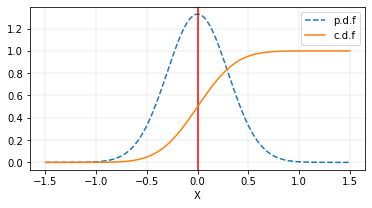

In [19]:
#----------------------
plt.figure( figsize=(6,3))

mu = 0
scale = 0.3
x = np.linspace(-1.5, 1.5, 1000)
max = scipy.stats.norm.pdf(mu, loc=mu,  scale=scale)

y0 =  scipy.stats.norm.pdf(x, loc=mu,  scale=scale)
y1 = scipy.stats.norm.cdf(x, loc=mu,  scale=scale)

plt.plot (x, y0, linestyle='--', label="p.d.f")
plt.axvline(x=0, ymin=0, ymax=max, color='red') 
plt.plot(x, y1, label="c.d.f")
plt.legend(loc='best')
plt.grid(lw=0.2)
plt.xlabel("X")

plt.show()


Dado un intervalo $[a,b]$ la probabilidad de que la variable tome un valor dento de él
$$
P(a \leq X \leq b) =  F(b) - F(a) =  \int_{-\infty}^b f(x) \, dx -  \int_{-\infty}^a f(x) \, dx =  \int_a^b f(x) \, dx 
$$

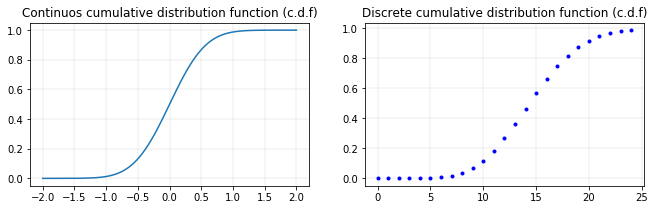

In [18]:
ig, ax = plt.subplots(1, 2, figsize=(11,3)) 

x = np.linspace(-2., 2., 900)

mu  = 0.  # loc
sigma = np.sqrt(0.2)  # scale
y = scipy.stats.norm.cdf(x, loc=mu,  scale=sigma) 
ax[0].plot(x, y)
ax[0].set_title('Continuos cumulative distribution function (c.d.f)')
ax[0].grid(lw=0.2)


x = np.arange(0, 25)
mu = 15
y = scipy.stats.poisson.cdf(x, mu)
ax[1].plot(x, y, 'bo', ms=3)
#ax[1].vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
#ax[1].legend(loc='best', frameon=False)
ax[1].grid(lw=0.2)
ax[1].set_title('Discrete cumulative distribution function (c.d.f)')

plt.show()

## Medidas características

**Medidas de centralización:**

* Media, valor esperado o esperanza de una variable aleatoria $X$
    * Variable continua:
    
     $$ \mu = \langle x \rangle =  E[X]= \int_{- \infty}^{\infty} x  \, f(x) \, dx $$

    * Varible discreta:
     
    $$ \mu = \langle x \rangle =  E[X]= \sum_{j=1}^J x_j p(x_j) $$

* percentil:
Es el valor $x_p$ de la variable aleatoria $X$ para el cual la función de distribución toma el valor de la probabilidad que se se indica con el percentil $p$.

$$
F_X(x_p) = \mathcal{p}
$$

$$
  x_p = F^{-1} (p)
$$ 

>**Ejemplo** 
>
>Supongamos una variable aleatoría $X$ que se distribuya segun una distribución normal de media 0 y dispersión 1. Si se observase un valor aleatorio de la v.a existe un  $97.5\%$ de probabilidad ($p=0.975$) de que sea inferior a 1.96.  O lo que es lo mismo la probabilidad de que la variable aleatoria $X$ tome un valor $x \in [-1.96, 1.96]$ es del $95\%$ 

   El percentil $\frac{1}{2}$ se denomina mediana (o "segundo cuartil"), al percentil 0.25 primer cuartil y al 0.75 tercer cuartil. 
 
**Medidas de dispersión:**

* Varianza (y dispersión). Es una medidad de la dispersión de los valores de $X$ en torno a la media. Para obtenerla necesitamos conocer la función densidad de probabilidad (p.d.f) de la variable aleatoria.
 * Variable continua:
$$ 
\sigma^2 = \text{Var}(X) = E[(X- \mu)^2] = \int_{- \infty}^{\infty} (x- \mu)^2  \, f(x) \, dx 
$$
 La varianza también puede expresarse como:
$$
\text{Var}(x) = \int_{- \infty}^{\infty} (x- \mu)^2  \, f(x) \, dx = 
 \int_{- \infty}^{\infty} (x)^2  \, f(x) \, dx + 
 2 \mu  \int_{- \infty}^{\infty} x \, f(x) \, dx + 
 \mu^2 \int_{- \infty}^{\infty}  f(x) dx
= E[X^2] - \mu^2
$$

  * Variable discreta:
 $$ 
\text{Var}([X) =  E[(X- \mu)^2] = \sum_{j=1}^J  (x_j-\mu)^2 p_j = 
E[X^2] - \mu^2
$$

 La dispersión se define como la raíz cuadrada de la varianza $\sigma = \sqrt{\sigma^2}$.

* Rango intercuartil: Supongamos una variable aleatoria $X$. El rango intercuartil 
es la diferencia entre los valores de $x_{.75}$ y $x_{.25}$ correspondientes al tercer y al primer cuartil y representa la zona central donde se encuentra el $50\%$ de la probabilidad. Por tanto para calcularlo necesitamos conocer la función de distribución acumulada (c.d.f) de la variable aleatoria.
>**Ejemplo**
> Si $X$ se distribuye según una distribución normal de media 0 y dispersión 1 su rango intercuartil sería
>
>\begin{align*} 
F(x_{0.75}) &= 0.75 \rightarrow x_{0.75}= 1.88  \\ 
F(x_{0.25}) &=  0.25 \rightarrow x_{0.25}= -0.67 \\ 
\text{r.i}_{  \left[ x_{0.75} , x_{0.25}  \right] } &= \left[ -0.67 , 1.88  \right]
\end{align*}

**Valor esperado de una función**

Supongamos una variable aleatoria $X$ con p.d.f $f(x)$. El valor esperado de una función $y=h(x)$ será

$$E[y] =  E \left[  h(x) \right]  =  \int_{- \infty}^{\infty} h(x)  \, f(x) \, dx $$

$$ E \left[  h(x) \right]  =   \sum_{i=1}^n h(x_i) p_i $$
  

* `Probabilidad condicionada`: Sabiendo que el valor de la variable $X$ es mayor que $a$ ¿Cual es la probabilidad de que el valor de la variable sea menor que $b$?

>**Solución**
>
>La información de que dispongo (en este caso concreto se conoce que la variable aleatoria tiene un valor mayor que $a$) condiciona la probabilidad del evento   
>
>$$P(x \leq b \,  | \,  x \geq a ) = \frac{ P( a \leq x \leq b)}{ P( x \geq a) } $$

# Modelos univariantes de distribuciones de probabilidad

## Distribuciones Continuas

### Distribución Uniforme
 
 $X \sim \mathcal{U}(a,\, b)$
 
Una variable aleatoria $X$ es uniforme en un intervalo $(a, b)$ si su función de densidad es constante en dicho intervalo y nula fuera de él

$$ f(x | a, b)=\begin{cases}\frac{1}{b-a} & a \leqslant x \leqslant b\\ 0 &\text{otherwise}\end{cases}.$$

Para indicar que $X$ se distribuye según una distribucón uniforme se emplea la notación $ X \sim \mathcal{U}(a,\, b)$ donde los parámetros $a$ y $b$ indican los límites del intervalo.

>**Ejemplo**
>
> En una variable aleatoria $ X \sim \mathcal{U}(a,\, b)$, la probabilidad de que $X$ tome un valor en un determinado sub-intervalo  $\delta \in [a,b]$ es la misma a la que tome un valor en cualquier otro sub-intervalo  $\delta' \in [a, b]$ si ambos tienen el mismo tamaño.

| **Parámetro** | $ -\infty < a < b< \infty $ | 
| ----- |----|
| **Standard**| $a=0,\, b= 1$ |
|Soporte | $ x \in [a , \, b)$ | 
|Media | $\frac{1}{12} (a+b) $ |
|Varianza | $ \frac{1}{12} (b-a)$|
|PDF | $ f(x | a, b)=\begin{cases}\frac{1}{b-a} & a \leqslant x \leqslant b\\ 0 &\text{otherwise}\end{cases}.$ |  
|CDF | $ F(x | a, b)=\begin{cases}
0 & x < a 
\\ \frac{x-a}{b-a} &  x \in [a , \,  b]
\\ 1 & x \geq b \end{cases}.$ |




>*Demostración:*
$$
E[X] = \mu = \int_{a}^{b} x f(x) \, dx  =
\int_{a}^{b} x \frac{1}{b-a} dx = 
\frac{1}{b-a} \int_a^b x dx =
\frac{1}{2 (b-a)}  [x^2 ]_a^b = \frac{1}{2} (b+a)
$$
$$
\text{Var}[X] = E[X^2] -  (E[X])^2 = 
\int_{a}^{b} x^2 f(x) \, dx  - \mu^2 = 
\int_{a}^{b} x^2 \frac{1}{b-a} \, dx - \mu^2 =
\frac{1}{12} (b-a)^2
$$



En la siguiente figura se han representado la p.d.f y la c.d.f de dos variables aleatoriasde distribución uniforme $\mathcal{U}(0,1)$ y  $\mathcal{U}(0,1.25)$.

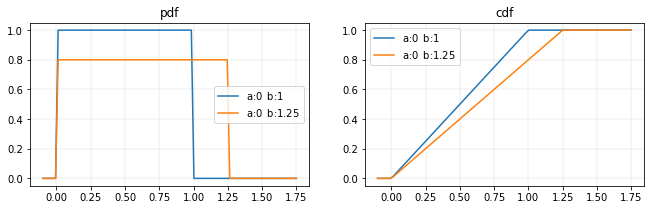

In [20]:
a = 0
b = 1

x_min = a- 0.1
x_max = b + 0.75
x = np.linspace(x_min, x_max, 100)

fig, ax = plt.subplots(1, 2,sharex=True, figsize=(11,3)) 

y = scipy.stats.uniform.pdf(x, loc=a, scale=b-a)
texto = r'a:' + str(a) + r'$\,$ b:' + str(b)
ax[0].plot(x, y, label=texto)


a = 0
b = 1.25
y = scipy.stats.uniform.pdf(x, loc=a, scale=b-a)
texto = r'a:' + str(a) + r'$\,$ b:' + str(b)
ax[0].plot(x, y, label=texto)


ax[0].set_title('pdf')
ax[0].legend(loc='best')
ax[0].grid(lw=0.2)

#-----cumulative distribution

a = 0
b = 1
y = scipy.stats.uniform.cdf(x, loc=a, scale=b-a)
texto = r'a:' + str(a) + r'$\,$ b:' + str(b)
ax[1].plot(x, y, label=texto)

a = 0
b = 1.25
y = scipy.stats.uniform.cdf(x, loc=a, scale=b-a)
texto = r'a:' + str(a) + r'$\,$ b:' + str(b)
ax[1].plot(x, y, label=texto)


ax[1].set_title('cdf')
ax[1].legend(loc='best')
ax[1].grid(lw=0.2)




En la siguiente figura se muestra un ejemplo de una muestra (r.v.s) de tamaño $n$, $ X= \{x_1, x_2, \ldots x_n\}$ extraida de una distribución uniforme $\mathcal{U}(a,\, b)$.  El de dominio $[0, 1]$. Como era de esperar los puntos parecen distribuirse uniformenete en el intervalo. En la figura de la derecha se muestra el histograma correspondiente. La altura de cada uno de los "bins" (rectaángulos) del histograma representa la frecuencia relativa de aparición de eventos en el intervalo cubierto por el bin. Las frecuencias han sido normalizadas para que el histograma tenga area 1 y por tanto sea consistente con una función densidad de probabilidad. Aunque hay cierta dispersión en las frecuencias debido al pequeño tamaño de la muestra $(n=300)$, la forma del histograma se aproxima a la función de distribución de probabilidad (p.d.f) de la distribución $\mathcal{U}(0,\, 1)$, linea roja. Las diferencias entre el histograma y la p.d.f disminuyen a medida que aumenta el tamaño de la muestra $(n=2000)$

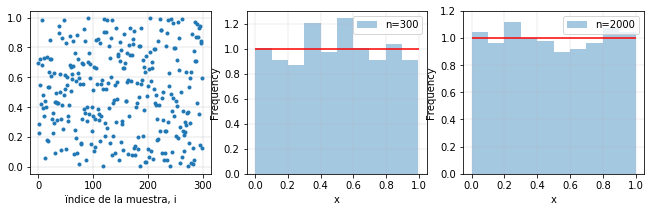

In [21]:
# Muestra de una distribución uniforme. Comparación histograma / pdf
size = 300

x = np.arange (size) 

fig, ax = plt.subplots(1, 3,sharex=False, figsize=(11,3)) 

y = scipy.stats.uniform.rvs(size=size)
ax[0].plot(x, y, '.')
ax[0].set_xlabel("ïndice de la muestra, i")
ax[0].grid(lw=0.3)


ax[1].hist (y, density=True,  histtype='stepfilled', alpha=0.4, label="n="+str(size))
ax[1].hlines (1,0, 1, color='red')

ax[1].grid(lw=0.2)
ax[1].set_xlabel("x")
ax[1].set_ylabel("Frequency")
ax[1].legend(loc='best')


# Muestra n= 1000
size = 2000
y = scipy.stats.uniform.rvs(size=size)
ax[2].hist (y, density=True,  histtype='stepfilled', alpha=0.4, label="n="+str(size))
ax[2].hlines (1,0, 1, color='red')

ax[2].grid(lw=0.2)
ax[2].set_xlabel("x")
ax[2].set_ylabel("Frequency")
ax[2].legend(loc='best')
ax[2].set_ylim([0,1.2])


plt.show()

# Análisis de los bins del histoframa

#(n, bins, patches) = plt.hist(y, label='hst')

### Distribución Exponencial

$X\sim \text{Exp}(\lambda)$,

$$ f(x | \lambda)=\begin{cases}\lambda e^{-\lambda x} & x > 0\\ 0 &\text{otherwise}\end{cases}.$$



| **Parámetro** | $\lambda > 0$ | 
| ----- |----|
|Soporte | $ x \in [0 , \, \infty)$ | 
|Media | $\frac{1}{\lambda}$ |
|Varianza |  $\frac{1}{\lambda^2}$|
|PDF     |  $f(x | \lambda) = \lambda e^{-\lambda x}$ |
|CDF     |  $F(x | \lambda) = 1-  e^{-\lambda x}$ |




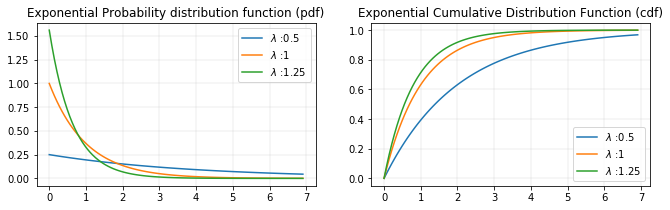

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

#------------- Display probability density function (pdf) -----------

fig, ax = plt.subplots(1, 2,sharex=True, figsize=(11,3)) 


mylambda  = 1
alpha = 0.001
x_min = scipy.stats.expon.ppf(alpha, scale = 1/(mylambda*mylambda))
x_max = scipy.stats.expon.ppf(1-alpha, scale =1/(mylambda*mylambda))
x = np.linspace(x_min, x_max, 100)


mylambda = 0.5
y = scipy.stats.expon.pdf(x, scale=1/(mylambda*mylambda))
texto = r'$\lambda$ :' + str(mylambda)
ax[0].plot(x, y, label=texto)

mylambda = 1
y = scipy.stats.expon.pdf(x, scale=1/(mylambda*mylambda))
texto = r'$\lambda$ :' + str(mylambda)
ax[0].plot(x, y, label=texto)

mylambda = 1.25
y = scipy.stats.expon.pdf(x, scale=1/(mylambda*mylambda))
texto = r'$\lambda$ :' + str(mylambda)
ax[0].plot(x, y, label=texto)

ax[0].set_title('Exponential Probability distribution function (pdf)')
ax[0].legend(loc='best')
ax[0].grid(lw=0.2)




#----------------- Cumulative distribution Function-----------------

mylambda = 0.5
y = scipy.stats.expon.cdf(x, scale=1/(mylambda))
texto = r'$\lambda$ :' + str(mylambda)
ax[1].plot(x, y, label=texto)


mylambda = 1
y = scipy.stats.expon.cdf(x, scale=1/(mylambda))
texto = r'$\lambda$ :' + str(mylambda)
ax[1].plot(x, y, label=texto)


mylambda = 1.25
y = scipy.stats.expon.cdf(x, scale=1/(mylambda))
texto = r'$\lambda$ :' + str(mylambda)
ax[1].plot(x, y, label=texto)

ax[1].set_title('Exponential Cumulative Distribution Function (cdf)')
ax[1].legend(loc='best')
ax[1].grid(lw=0.2)




Un tṕico ejemplo de variable aleatoria con distribución exponencial es el tiempo que transcurre entre las peticiones (eventos) que llegan a un servidor.

La distribución exponencial tiene la propiedad de ser un "proceso sin memoria". Un proceso sin memoria es aquel para el cual se cumple la probabilidad condicionada $P (X > s+t  | X > s) = P(X > t) $ para todo $t, s > 0$.

$$
P (X > s+t \, | \, X > s) = \frac{ P (X > t+s \, \land\, X > t) }{P(X > s)} = \frac{ P (X > t+s )}{P (X > s)} =
\frac{e^{-\lambda(t+s)} }{ e^{-\lambda s}} = e^{-\lambda t}
$$


>**Ejemplo**
>
> Proceso "sin memoria": En el ejemplo anterior donde la variable aleatoria $X$ representaba el intervalo de tiempo transcurrido entre la llegada de trabajos a un servidor, la probabilidad condicionada anterior afirma que si han transcurridos $s$ segundos (por ejemplo 20 segundos) sin haber llegado una petición al servidor desde que llego la última, la probabilidad de que no llegue una petición antes de los próximos $t$-segundos (por ejemplo en los próximos 10 segundos) es la misma que la probabilidad de que no llegue una petición en los primeros 10 segundos desde que llegó la última petición.    




> **Pregunta:**
>
>¿Tedría sentido representa la distribución del tiempo de vida medio de un dispositivo por una distribución exponencial?


### Distribución Normal

$ X \sim \mathcal{N}(\mu,\,\sigma^{2})$,


$$ f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{  \frac{-(x - \mu)^2}{ 2 \sigma^2} }$$


| **Parámetro** | $ \mu \; , \sigma > 0$ | 
| ----- |----|
| **Standard** | $ \mu  = 0 \; , \sigma  = 1$ | 
|Soporte | $ x \in (-\infty , \, \infty)$ | 
|Media | $\mu$ |
|Varianza |  $\sigma^2$|
|PDF | $ f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{  \frac{-(x - \mu)^2}{ 2 \sigma^2} }$ |
|CDF | $ F(x | \mu, \sigma) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x- \mu}{\sigma \sqrt 2} \right) \right]$   |






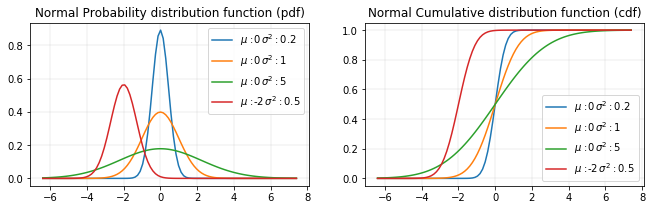

In [23]:


plt.figure(figsize=(11, 3))

#-------------------------------------------------------------------
#------------- Display probability density function (pdf) -----------
mu  = 0.5  # loc
sigma = np.sqrt(5)  # scale

alpha = 0.001
x_min = scipy.stats.norm.ppf(alpha, loc = mu, scale = sigma)
x_max = scipy.stats.norm.ppf(1-alpha, loc = mu, scale = sigma)
x = np.linspace(x_min, x_max, 100)


plt.subplot(121)


mu  = 0.  # loc
sigma = np.sqrt(0.2)  # scale
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(0) + r'$\, \sigma^2:$' + str(0.2) 
plt.plot(x, y, label=texto)

mu  = 0.  # loc
sigma = np.sqrt(1)  # scale
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(0) + r'$\, \sigma^2:$' + str(1) 
plt.plot(x, y, label=texto)

mu  = 0.  # loc
sigma = np.sqrt(5)  # scale
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(0) + r'$ \, \sigma^2:$' + str(5) 
plt.plot(x, y, label=texto)

mu  = -2  # loc
sigma = np.sqrt(0.5)  # scale
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(-2) + r'$ \, \sigma^2:$' + str(0.5) 
plt.plot(x, y, label=texto)


plt.title('Normal Probability distribution function (pdf)')
plt.legend(loc='best')
plt.grid(lw=0.2)

# plt.show()
#plt.savefig("normal_distribution.png")

#----------------- Cumulative distribution Function-----------------

plt.subplot(122)



mu  = 0.  # loc
sigma = np.sqrt(0.2)  # scale
y = scipy.stats.norm.cdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(0) + r'$\, \sigma^2:$' + str(0.2) 
plt.plot(x, y, label=texto)

mu  = 0.  # loc
sigma = np.sqrt(1)  # scale
y = scipy.stats.norm.cdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(0) + r'$\, \sigma^2:$' + str(1) 
plt.plot(x, y, label=texto)

mu  = 0.  # loc
sigma = np.sqrt(5)  # scale
y = scipy.stats.norm.cdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(0) + r'$ \, \sigma^2:$' + str(5) 
plt.plot(x, y, label=texto)

mu  = -2  # loc
sigma = np.sqrt(0.5)  # scale
y = scipy.stats.norm.cdf(x, loc=mu,  scale=sigma)
texto = r'$\mu$ :' + str(-2) + r'$ \, \sigma^2:$' + str(0.5) 
plt.plot(x, y, label=texto)


plt.title('Normal Cumulative distribution function (cdf)')
plt.legend(loc='best')
plt.grid(lw=0.2)

plt.show()



Algunos percentiles importantes:

In [3]:
# Algunas percentiles utiles

mu  = 0.  # loc
sigma = np.sqrt(0.2)  # scale


for i in [1,2, 3, 1.96] :
    texto = str(i) 
    x = mu + i * sigma
    y = scipy.stats.norm.cdf(x, loc=mu,  scale=sigma)
    texto =  chr(956) + '+' + str(i) + chr(963)
    print(f'F({texto}) =   {y:.6f} ')



F(μ+1σ) =   0.841345 
F(μ+2σ) =   0.977250 
F(μ+3σ) =   0.998650 
F(μ+1.96σ) =   0.975002 



| $x$|$P(X \leq x )$            | 
|:----|----:|
| $\mu + \sigma$     |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 0.8413 |
| $\mu + 2 \sigma$   |    0.9772 | 
| $\mu + 3 \sigma$   |    0.9986 |
| $\mu + 1.96 \sigma$   |    0.975 |


Donde la función $ \text{erf}(x) $ se define como 

$$
\text{erf}(x) =  \frac{2}{\pi} \int_0^x e^{-z^2}  dz 
$$


>**Ejemplo**
>
> Cuando $X$ es un v.a normal con $\mu =0$ y $\sigma=1$ se denomina **standard** y se denota por $\mathcal{N}(0,1)$. Si $X$ es una variable aleatoria estandard, $X \sim N(0,1)$, entonces la variable aleatoria $Z= X  \sigma + \mu z$ se distribuye según una $N(\mu , \sigma^2)$. 
Igualmente si $X \sim \mathcal{N}(\mu , \sigma^2)$,
entonces $Z=(x-\mu)/\sigma$ es $\mathcal{N}(0,1)$

## Distribuciones Discretas

Algunos ejemplos:

### Distribución de Bernuolli

$X \sim Bern(p)$

Una variable aleatoria se distribuye segun una distribución de Bernoulli de parámetro $p$ si su rango es $X \in [1, 0]$ y su p.m.f 

\begin{align*}
p(1) &= p \\
p(0) &= 1-p \\
p(k) &= 0 \, \, \, \, \text{otherwise} 
\end{align*}

Es decir $X$ solo toma dos valores 1 (éxito) o 0 (fallo). Es fácil demostrar:

\begin{align*}
E[X]  &= p \\
\text{Var}[X]  &= p (1-p)   
\end{align*}

>*Demostración*
>\begin{align*}
E[X] &= \mu = \sum_{i=1}^{2} x_{i} p(x_i) = 1 \, p + 0 \, (1-p) = p  \\
\text{Var}[X] &= \sigma^2 =   \sum_{i=1}^{2} (x_{i}-\mu )² p(x_i) = (1-p)^2 p + (0-p)^2 (1-p) = p \, (1-p)
\end{align*}

> **Ejemplo**
>
> Para una v.a $X \sim Bern(p)$, la varianza será máxima (máxima entropía) cuando $p=\frac{1}{2}$ y valdrá 0 cuando $p=1$ o $p=1$, obvio ya que en estos casos todos los resultados posibles serán éxito o fracaso. 

A una muestra de valores extraidos independientemente de una distribución de Bernuolli, por ejemplo 
$\{ 1,1, 0, 1, 0, 0, 0 \}$ se denomina un proceso de Bernoulli.

### Distribción Binomial, 
$X \sim Bin (n, p)$

Si se realiza un proceso de Bernoulli de tamaño $n$  $\{ X_1, X_2 \cdots X_n \}$ el número total de éxitos $X = X_1+ X_2 + \cdots \ + X_n $ produce una variable aleatoria binomial con p.m.f

\begin{equation}
  p(x=k)=\begin{cases}
  \binom{n}{k}  p^k (1-p)^{n-k}, & \text{if $ 0 \leq k \leq n$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

>¿Cual ser el valor esperado y la varianza de la variable aleatoria $X \sim Bin (n, p)$?
>
>Teniendo en cuante que $X = X_1 + X_2 + \cdots \ + X_n$ y que $X_i$ son independientes y tienen la misma distribución $X \sim Ber(p)$
>
>$$\mu = E[X] = E \left[ \sum_{i=1}^{n} X_{i}  \right] =  
\sum_{i=1}^{n}  \left[ X_{i}  \right] = n p
$$
>$$ \text{Var}[X] = \text{Var} \left[ \sum_{i=1}^{n} X_{i}  \right] =  
\sum_{i=1}^{n}  \text{Var}\left[ X_{i}  \right] = n \, p \, q
$$


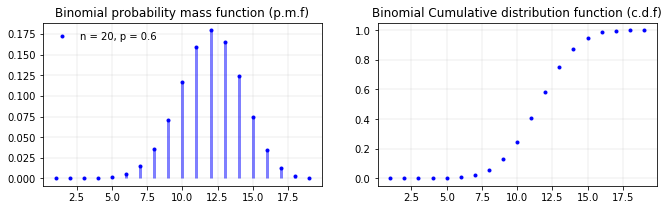

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(11, 3))

n = 20
p = 0.6
texto = f'n = {n}, p = {p}'  

x = np.arange(1, n)
y = scipy.stats.binom.pmf(x, n, p)
ax[0].plot(x, y, 'bo', ms=3, label=texto)
ax[0].vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
ax[0].legend(loc='best', frameon=False)
ax[0].grid(lw=0.2)
ax[0].set_title('Binomial probability mass function (p.m.f)')

y = scipy.stats.binom.cdf (x, n, p)
ax[1].plot(x, y, 'bo', ms=3)
ax[1].grid(lw=0.2)
ax[1].set_title('Binomial Cumulative distribution function (c.d.f)')

plt.show()


* En el límite $n \rightarrow \infty$, la distribución binomial $Bin(n,p)$ se aproxima a una distribución normal $\mathcal{N}\left(np, n p (1-p) \right)$. En la siguiente gráfica se representa la distribuición binomial de parámetros $p=0.5$ frente a la normal para dos valores diferentes de $n$, panel izquierdo $=10$ y $n=6$ panel derecho. 

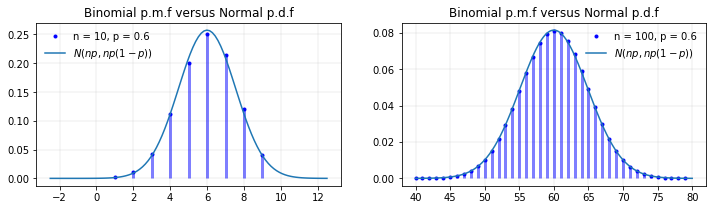

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

n = 10
p = 0.6
texto = f'n = {n}, p = {p}'  

x = np.arange(1, n)
y = scipy.stats.binom.pmf(x, n, p)
ax[0].plot(x, y, 'bo', ms=3, label=texto)
ax[0].vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
ax[0].grid(lw=0.2)
ax[0].set_title('Binomial p.m.f versus Normal p.d.f')


mu  = n*p  # loc
sigma = np.sqrt(n*p*(1-p))  # scale
texto = r'$N(n p, n p (1-p))$' 
x = np.linspace(-2.5, 12.5, 100)
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma)
ax[0].plot(x, y, label=texto)

ax[0].legend(loc='best', frameon=False)

#-------- Right
n = 100
p = 0.6
texto = f'n = {n}, p = {p}'  

x = np.arange(40, 80)
y = scipy.stats.binom.pmf(x, n, p)
ax[1].plot(x, y, 'bo', ms=3, label=texto)
ax[1].vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
ax[1].grid(lw=0.2)
ax[1].set_title('Binomial p.m.f versus Normal p.d.f')


mu  = n*p  # loc
sigma = np.sqrt(n*p*(1-p))  # scale
texto = r'$N(n p, n p (1-p))$' 
x = np.linspace(40, 80, 1000)
y = scipy.stats.norm.pdf(x, loc=mu,  scale=sigma)
ax[1].plot(x, y, label=texto)

ax[1].legend(loc='best', frameon=False)

plt.show()

### Distribción uniforme discreta

### Distribución de Poisson 

Sea $X$ una variable aleatoria discreta que contabiliza el número de eventos que se producen en una determinada *unidad de observación* (por ejemplo tiempo, espacio). Se dice que $X$ se distribuye según una distribución de Poisson, si (i) los eventos son independientes, es decir el proceso no tiene memoria: conocer el número de eventos en un intervalo no ayuda a predecir el número de eventos en el siguiente y (ii) es estable: produce, a largo plazo, un número medio de eventos constante $\lambda$ por unidad de observación.  

La probabilidad de que se produzcan n eventos en un intervalo de tiempo
$$ p(X = n | \lambda) = \frac{ \lambda^n \, e^{-\lambda} }{ n! }$$ 

> Un ejemplo de distribución de Poisson son el número de servicios que se requieren a un servidor en una determinada unidad de observación, por ejemplo un dia.


| **Parámetro** | $ \lambda \in \mathbb{R} \; , \lambda > 0$ | 
| ----- |----|
| **Standard** | $ \lambda  = 1$ | 
|Soporte | $ n \in \{ 0 , 1, \cdots \}$ | 
|Media | $\lambda$ |
|Varianza |  $\lambda$|
|PDF | $ p(X = n | \lambda) = \frac{ \lambda^n \, e^{-\lambda} }{ n! } $|
|CDF | $ P(x \leq n | \lambda) = \frac{\Gamma (n+1, \lambda)}{n!} $   |


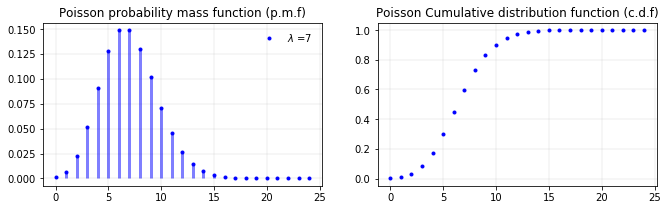

In [6]:
#np.random.seed(123)  # semilla para reproducibilidad

fig, ax = plt.subplots(1, 2, figsize=(11, 3))

mu = 7
texto = r'$\lambda$ =' + str(mu) 

x = np.arange(0, 25)
y = scipy.stats.poisson.pmf(x, mu)
ax[0].plot(x, y, 'bo', ms=3, label=texto)
ax[0].vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
ax[0].legend(loc='best', frameon=False)
ax[0].grid(lw=0.2)
ax[0].set_title('Poisson probability mass function (p.m.f)')

y = scipy.stats.poisson.cdf (x, mu)
ax[1].plot(x, y, 'bo', ms=3)
ax[1].grid(lw=0.2)
ax[1].set_title('Poisson Cumulative distribution function (c.d.f)')

plt.show()


# Teorema central del limite

Supongamos que tenemos una muestra i.i.d de tamaño $n$ $\{ X_1, X_2, X_3, \ldots , X_n \}$ extraida de una distribución de media  $\mu$ y de varianza $\sigma^2 $. Como cada elemento de la muestra es, a su vez, una variable aleatoria, la media muestral $S_n$ 
$$ S_n = \frac{1}{n} \sum_{i=1}^n X_i $$
también será una variable aleatoria: si extrayésemos otra muestra de la distribución y calculásemos la media muestral obtendríamos otro valor de $S_n$.  ¿Que sabemos de la distrubución de $S_n$, esto es de la distribución de las medias muestrales?. 

* El valor esperado de $S_n$ coincide con la media de la distribución $\mu$. 
$$
E[S_n] = E \left[ \frac{1}{n} \sum_{j=1}^{j=n} X_j \right]= 
\frac{1}{n} \sum_{j=1}^{j=n} E \left[ X_j \right] = 
\frac{1}{n} n \, \mu = \mu
$$
   Por tanto $S_n$ _*será un buen estimador (puntual) de la media de la distribución*_. Importante el valor esperado de la media muestral **no** dpende del tamaño de la muestra.

* Utilizando el hecho de que la varianza de una suma de variables aleatorias independientes es la suma de las varianzas de los sumandos, la varianza de la media muestral $S_n$ será
$$
\text{Var} \left[ S_n \right] = \text{Var}  \left[  \frac{1}{n} \sum_{j=1}^{j=n} X_j \right] = \frac{1}{n^2} \sum_{j=1}^{j=n}  \text{Var}( X_j ) = \frac{\sigma^2}{n}
$$

* El teorema central del límite nos dice además que en el límite $n \rightarrow \infty$ la distribución de $S_n$ converge asintóticamente a una distribución normal con media $\mu$ y varianza  $\frac{\sigma^2}{n}$, esto es,
$$
S_n \rightarrow  \mathcal{N}\left( \mu,\,\frac{\sigma^2}{n} \right).
$$
  Este resultado es fundamental para las simulaciones de Monte Carlo.

>Para ilustrar el teorema central del límite extraigamos $N$ muestras de tamaño $n$ de una distribución exponencial $ X \sim \text
{Exp}(\lambda)$  de parámetro $\lambda = 8$. 
La media y la varianza de la variable aleatoria $X$ son  $E(X) = \text{Var}(X) = \frac{1}{8} = 0.125$. Por el teorema central del límite esperamos que la distribución de las $N$ medias muestrales se aproxime a:
$$
S_n \rightarrow 
\mathcal{N}\left( \mu,\,\frac{\sigma^2}{n} \right)
\rightarrow 
\mathcal{N}\left( \frac{1}{8},\,\frac{1}{64 n} \right)
\, \, \, \, \text{cuando} \, \, \, \, n \rightarrow \infty
$$
Los histogramas de las medias muestrales $S_n$ para  $n=8, 32, 64, 128$ se muestran en los paneles de la siguiente figura. Se observa que aunque la distribución exponecial original está lejos de una distribución normal y el tamaño de la muestra $n=8$ sea reducido, el histograma de las $N$ medias muestrales se aproxima a la distribución normal.
En la siguiente figura se compara la varianza de la distribución de las medias muestrales experimentales(puntos azules) con el resultado teórico (linea roja) para diferentes tamaños de muestras.


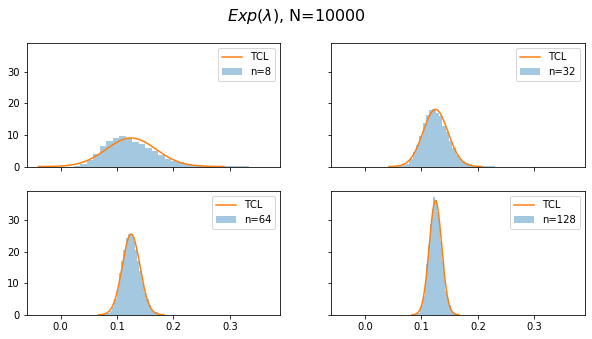

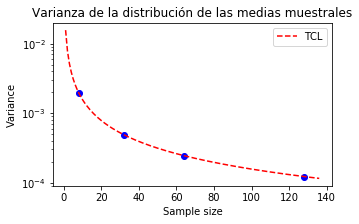

In [3]:
np.random.seed(123)  # semilla para reproducibilidad

# numero de muestras
N = 10000  

# tamaño de cada muestra
n = [2**3, 2**5, 2**6, 2**7]  

nfila = 2
ncol = 2
fig, ax = plt.subplots (nfila, ncol, sharex=True, sharey=True, figsize=(10,5)) 

# Las muestras son extraida de una distribución exponencial
mylambda = 8
sample = scipy.stats.expon.rvs(size=N*np.max(n), scale=1/mylambda)

# almacena tamaño de la muestra, media y varianza de cada distribucion de medias
resumen = np.zeros ((3,len(n))) 

for i in np.arange(len(n)):
    mat = np.array(sample[0:n[i]*N]).reshape (n[i], N)
    medias = np.mean (mat, axis=0, dtype=np.float64)
    
    # Estadisticos de la distribuciń de las medias muestrales
    varianza = np.var(medias, dtype=np.float64)
    media = np.mean (medias, dtype=np.float64) 
    resumen[:, i] = [n[i], media, varianza]
                    
    # distribucion teorica TCL
    mu = 1/mylambda
    sigma = (1/mylambda) / np.sqrt(n[i])  
    
    alpha = 0.0001
    s_min = scipy.stats.norm.ppf(alpha, loc = mu, scale = sigma)
    s_max = scipy.stats.norm.ppf(1-alpha, loc = mu, scale = sigma)
    
    support = np.linspace(s_min, s_max, 1000)
    y = scipy.stats.norm.pdf(support, loc=mu, scale = sigma)
    
    # dibuja histograma 
    ax[int(i/ncol)][i%ncol].hist (medias, bins=30, density=True, 
       histtype='stepfilled', alpha=0.4, label='n='+str(n[i]) )
    # dibuja teorica TCL
    ax[int(i/ncol)][i%ncol].plot(support, y, label="TCL")  
    
    ax[int(i/ncol)][i%ncol].legend(loc='best')
    fig.suptitle (r'$ Exp (\lambda)$, N='+str(N), fontsize=16)

plt.show()
                    

# TCL: Dependencia de la varianza con el tamaño de la muestra    

plt.figure(figsize=(5,3))
x = np.arange(np.max(resumen[0,:]) + 10)[1:-1]
y = lambda x: mu**2/x
plt.plot (resumen[0,:], resumen[2,:], 'o', color='b')
plt.plot (x, y(x), color="red", linestyle='--' , label="TCL")
plt.legend(loc='best')
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.yscale('log')
plt.title("Varianza de la distribución de las medias muestrales")

plt.show()

## Intervalo de confianza en la estimación de la media de una distribución desconocida

Supongamos que tenemos una única muestra de tamaño $n$ proveniente de una distribución de la que desconocemos tanto su media $\mu$ como su varianza $\sigma^2$.
¿Podemos estimar $\mu$ a partir de la muestra? Sí. 
¿Con que error?.

En la sección anterior hemos visto como la media muestral $S_n$ es un buen estimador de la media de la distribución. Sin embargo junto con el valor de cualquier estimación *siempre* debemos dar su intervalo de confianza.      

Por el Teorema Central del límite sabemos que $S_n$ se distribuye según una distribución normal $\mathcal{N} \left( \mu, \sigma^2 / n \right)$. Por tanto la variable $Z$
$$ 
Z = \frac{ S_n - \mu}{ \sigma / \sqrt{n}}
$$
se distribuirá según la distribución normal $\mathcal{N}(0,1)$.
Pero, por las propiedades de la c.d.f de la distribución  $\mathcal{N}(0,1)$ sabemos que el valor de $Z$ correspondiente al valor observado de $S_n$ (el que fuese) con un $95\%$ de probabilidad será superior a  -1.96 e inferior a 1.96. Es decir,

$$ 
P \left(-1.96 \leq  Z \leq 1.96 \right) = F(1.96) - F(-1.96) = 0.975 - 0.025 = 0.95
$$
Subsitituyendo la expresión de Z podemos reescribir la igualdad anterior como,

$$
P \left( -1.96 \leq  \frac{ S_n - \mu}{ \sigma / \sqrt{n}} \leq  1.96 \right) = 0.95
$$

Despejando $\mu$ en las dos inecuaciones anteriores 


$$
-1.96   \leq  \frac{ S_n - \mu}{ \sigma / \sqrt{n}} 
\, \, \, \, \,   \Longrightarrow 	 
\mu \leq  S_n +1.96 \frac{\sigma}{\sqrt{n}}  \\
  \frac{ S_n - \mu}{ \sigma / \sqrt{n}} \leq 1.96
 \, \, \, \, \, \Longrightarrow 	 
 \mu \geq S_n -1.96 \frac{\sigma}{\sqrt{n}} 
$$

obtenemos el intervalo de confianza para nuestra estimación de $\mu$ con probabilidad 0.95
\begin{equation}
P  \left( S_n  -1.96  \frac{\sigma}{\sqrt{n}}   \leq \mu \leq 
S_n +1.96 \frac{\sigma}{\sqrt{n}}\right) = 0.95
\end{equation}

Obviamente no hay nada especial en la probaibilidad 0.95 ($\alpha=5\%=0.05$).
Si elegimos otra probabilidad, por ejemplo 90% ($\alpha = 0.1$), simplemente habría que substituir los valores 1.96 ($=z_{0.975}$)  y -1.96 ($=z_{0.025}$) por los valores correspondientes en la función de distribución  $\mathcal{N}(0,1)$ para la probabilidad elegida 

$$
P  \left( S_n  + z_{\alpha / 2}  \frac{\sigma}{\sqrt{n}}   \leq \mu \leq 
S_n +  z_{1-\alpha / 2} \frac{\sigma}{\sqrt{n}}\right) = 1- \alpha
$$

Además como $\mathcal{N}(0,1)$ es simétrica $ z_{1-\alpha / 2} = -  z_{\alpha / 2}$ 
y por tanto podemos re-escribir la probabilidad anterior de la forma en que habitualmente se presenta  en la bibliografía
$$
P  \left( S_n  -  z_{\alpha / 2}  \frac{\sigma}{\sqrt{n}}   \leq \mu \leq 
S_n +  z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}\right) = 1- \alpha
$$
o también como 
$$
P  \left(  \left| S_n -  \mu  \right| \leq 
 z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}\right) = 1- \alpha
$$
La formula anterior tiene una interpretación muy clara: *El error que cometemos al estimar el valor medio de una distribución por medio de una muestra de tamaño $n$ con una probabilidad $1 - \alpha$ es:*
$$
\text{Error} \, = \, z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}
$$
El principal problema para aplicar la fórmula anterior es que depende de la dispersión de $X$ ($\sigma$) que a menudo no conocemos (al igual que nos es desconocido el valor $\mu$ que tratamos de estimar). Pero esto no es un problema. En estos casos utilizaremos como estimador de $\sigma^2$ la varianza muestral $s^2$ definida como 
$$
s^2(n) = \frac{1}{n-1} \sum_{i=1}^n (X_i - S_n)^2
$$
Se puede demostrar que $s^2(n) \rightarrow \sigma^2$ con probabilidad 1 cuando $n \rightarrow \infty $ y $E[s²(n)]= \sigma^2, \, \,n \leq 2$. Por tanto
$$
P  \left( S_n  -  z_{\alpha / 2}  \frac{s}{\sqrt{n}}   \leq \mu \leq 
S_n +  z_{\alpha / 2} \frac{s}{\sqrt{n}}\right) = 1- \alpha
$$

> Ejemplo:
>
>Supongamos que tenemos una muestra i.i.d de tamaño $n$, $\{x_1, x_2, \cdots, x_n \}$, de una variable aleatoria $X$. No conocemos la distribución de $X$ ni ninguno e sus estadísticos (es decir no conecemos ni su media ni su varianza). Asumimos que $X$ satisface las condiciones necesarias del *Teorema central del límite*.
>
> La siguiente función de Python `mean_confidence`devuelve una estimación del valor esperado  de la distribución (media muestral) y su intervalo de cofianza con aproximación $\alpha$.
>
> **Nota:** Para probar la función en vez de leer la muestra de un fichero o cualquier otro dispositivo, generamos la muestra a partir de una distribución dada utilizando la función correspondiente de la librería `scipy.stats`. Es decir, que hacemos trampa!! En contrapartida esto nos va a permitir validar nuestros resultados.   
>
> En el ejemplo que se adjunta la muestra (n=20) ha sido extraida de una distribución de Bernoulli de parámetro $p=0.7$. Utilizando **únicamente** la muestra obtenemos el intervalo de confianza de nuestra estimación de la media de $X$ con una confianza del 95%.

In [41]:
# semilla para reproducibilidad de los resultados
np.random.seed(124)

def mean_confidence (sample, alpha) :
    ''' Devuelve la media muestral y el intervalo de confianza '''
    # valor de z_alpha/2
    z_2 =  scipy.stats.norm.ppf(1 - (alpha / 2) )
    
    # media muestral
    sample_mean = np.mean (sample, dtype=np.float64)
    # varianza de la muestra (n-1)
    s2 = np.var (sample, ddof=1, dtype=np.float64)
    #limites del intervalo de confianza
    I_LEFT = sample_mean - z_2 * np.sqrt(s2) / np.sqrt(len(sample)) 
    I_RIGHT = sample_mean + z_2 * np.sqrt(s2) / np.sqrt(len(sample))  
    
    return (sample_mean, I_LEFT, I_RIGHT)


#### -----  Ejemplo muestra de Bernoulli -----------------
alpha = 0.05

# genera la muestra
size = 20
p = 0.7
sample = scipy.stats.bernoulli.rvs (p = p, size = size)

# media e intervalo de confianza    
sample_mean, i_left, i_right = mean_confidence (sample, alpha)
print("Tamaño de la muestra, n=", size)
print ("Muestra:", sample)
print( i_left, "<=",  chr(956), '_estimado'  , "<=", i_right)   
print (f' Error en la estimacion: {(i_right -i_left):.2f}' )    


Tamaño de la muestra, n= 20
Muestra: [1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0]
0.5552973212845925 <= μ _estimado <= 0.9447026787154075
 Error en la estimacion: 0.39


>¿Sabes que implica que podemos "confiar" en un 95%  en nuestra simulación?
>
> En el siguiente ejemplo el valor esperado para una variable X$ \sim Bern(\mu=0.7$) está fuera del intervalo reportado en 5 de las 100 simulaciones. El tamaño de las muestras en todas las simulaciones es 50. 

In [45]:
np.random.seed(124)  # semilla para reproducibilidad

alpha = 0.05
 
# genero N muestras de Bernouilli (p =0.7) de tamaño size 
p = 0.7
N = 100
size = 60
log = np.ones (N)

for i in np.arange (0,N) :
    sample = scipy.stats.bernoulli.rvs (p = p, size = size)
    
    sample_mean, i_left, i_right = mean_confidence (sample, alpha)
    
    if i_left > p or p > i_right:
        log[i] = False
        #print(i_left,  sample_mean, i_right)
        print(f'i_left: {i_left:.2f},  Estimado: {sample_mean:.2f}, i_right: { i_right:.2f}')

print("Simulaciones con intervalo reportado correcto:",sum(log))

i_left: 0.72,  Estimado: 0.82, i_right: 0.92
i_left: 0.42,  Estimado: 0.55, i_right: 0.68
i_left: 0.72,  Estimado: 0.82, i_right: 0.92
i_left: 0.44,  Estimado: 0.57, i_right: 0.69
i_left: 0.72,  Estimado: 0.82, i_right: 0.92
Simulaciones con intervalo reportado correcto: 95.0


# Referencias:

* K. Sigman, [Review of probability (sept 2020)](http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-0.pdf) 